# Ausarbeitung: Tasten Klassifizierung anhand des Geräuchs mittels Keras und Tensorflow 
### Universität: Hochschule der Medien Stuttgart
**Fakultät für Berufsbegleitende Studiengänge**

**Studiengang:** Data Science

**Abgabedatum:**  01.03.2024

**Professor:** Dr. Christian Becker-Asano

**Student:** Raghid Allaham

## Mutivation

In der heutigen Zeit, in der die Bedeutung von Technologie und digitaler Kommunikation stetig wächst, entpuppt sich die Möglichkeit, Tastenanschläge durch ihr einzigartiges Klangprofil zu identifizieren, sowohl als faszinierende technologische Errungenschaft als auch als potenzielles Risiko. Diese Entwicklung eröffnet ein vielfältiges Spektrum an innovativen Einsatzmöglichkeiten, die von der Verbesserung der Interaktion zwischen Mensch und Computer bis hin zu potenziellen Sicherheitsbedenken und der Gefahr von Spionage reichen.

Die entscheidende Rolle bei der Umsetzung dieser Technologie spielen Fortschritte in der künstlichen Intelligenz und spezialisierten Algorithmen für die Klassifizierung. Durch die Kombination leistungsfähiger Deep-Learning-Modelle mit fortschrittlichen Methoden der Computer-Audition erschließen sich neue Wege für eine akkurate Analyse und Interpretation von Klangprofilen und Formen. In dieser Arbeit werden solche technologischen Durchbrüche genutzt, um die feinen Nuancen in den Klangprofilen von Tastenanschlägen, die vom menschlichen Ohr oft nicht unterschieden werden können, zu erkennen und zu analysieren.

## Forschungsfragen:
1. *Inwieweit ist ein Computer in der Lage, Tasten einer Tastatur anhand ihrer Form zu klassifizieren?*
2. *Kann ein Computer anhand des Geräusches einer Taste auf einer Computer-Tastatur erkennen, um welche Taste es sich handelt, auch wenn sich die Tasten lediglich in ihrer Position auf der Tastatur und nicht in ihrer Form unterscheiden?*

## Struktur dieser Arbeit

Diese Arbeit ist in zwei Hauptteile gegliedert, um die eingangs formulierten Forschungsfragen zu adressieren.


**Teil I: Entwicklung eines Proof-of-Concept-Netzwerks für die Klangprofilklassifizierung**
Der erste Teil widmet sich der Beantwortung der Frage, ob es möglich ist, anhand des Geräusches einer Taste auf einer Computer-Tastatur zu erkennen, um welche Taste es sich handelt, selbst wenn sich die Tasten lediglich in ihrer Position auf der Tastatur und nicht in ihrer Form unterscheiden. In diesem Abschnitt wird ein Proof-of-Concept-Netzwerk entwickelt, das zeigt, wie solch eine akustische Klassifizierung realisiert werden kann. Ähnlich wie im ersten Teil, wird auch hier ein Algorithmus von Grund auf erstellt und mit eigens aufgezeichneten Klangdaten trainiert und validiert.

**Teil II: Klassifizierung von Tastaturtasten anhand ihrer Form**
Im zweiten Teil dieser Arbeit konzentrieren wir uns auf die Fragestellung, inwieweit ein Computer in der Lage ist, Tasten einer Tastatur mit verschidenen Formen anhand deren Geräusch zu klassifizieren. Hierbei wird ein detaillierter Einblick in die verwendeten Techniken und Methoden gegeben. Dies umfasst die Entwicklung eines Algorithmus von Grund auf, der speziell für diese Art der Klassifizierung konzipiert wird. Die Grundlage für das Training und die Validierung dieses Algorithmus bilden selbst aufgezeichnete Daten, die eine Vielzahl von Tastenformen abdecken.

## Hilfsmittel und Daten

### Datenerfassung

Für die Datenerfassung wurde eine speziell entwickelte Python-Anwendung eingesetzt, die in der Lage ist, Tastenanschläge zu registrieren und diese entsprechend zu kennzeichnen. Die Kennzeichnung erfolgte durch die Vergabe von Labels, die sich aus den Anfangsbuchstaben der betätigten Tasten zusammensetzen. Diese Labels wurden genutzt, um die aufgezeichneten Datenfiles systematisch zu benennen und sie anschließend automatisiert in eine strukturierte Ordnerhierarchie zu sortieren. Jede der aufgezeichneten Dateien repräsentiert einen einzelnen Tastenanschlag mit einer Dauer von einer Sekunde.

### Aufnahmesetup:

Das nachfolgende Bild illustriert das eingesetzte Aufnahmesetup, das sich durch die Verwendung des Samson Q2U Mikrofons und der Lenovo MT 81 TL Tastatur auszeichnet. Dieses Setup wurde sorgfältig ausgewählt, um die Anforderungen an die Datenqualität für die KI-basierte Analyse zu erfüllen.

![Recording Setup](./etc/recording_setup.JPEG "Recording Setup")

### Datenmenge und Auswahl der Tasten

Angesichts der umfangreichen Anzahl von Tasten auf einer Standardtastatur (etwa 105) und dem Ziel, pro Taste etwa 200 Aufnahmen zu erstellen, ergibt sich eine theoretische Gesamtzahl von ca. 21.000 einzelnen Aufzeichnungen. Um diesen enormen Zeitaufwand zu bewältigen und dennoch einen aussagekräftigen Proof of Concept zu erbringen, fokussierte sich das Projekt zunächst auf eine selektive Anzahl von Tasten. Für die Untersuchung der ersten Forschungsfrage wurden spezifisch die Tasten '1', '6', 'Shift', 'Space' und 'Enter' ausgewählt. Für die zweite Forschungsfrage erweiterte sich das Spektrum auf alle Zifferntasten (0 bis 9) sowie die oberste Buchstabenreihe der Tastatur (q bis p).

### Diversifizierung der Datenaufzeichnung

Um der Herausforderung des Overfitting zu begegnen und eine robuste Datengrundlage zu schaffen, wurde besonderer Wert auf die Variabilität der Aufzeichnungsbedingungen gelegt. Die Datensammlung erfolgte an unterschiedlichen Orten und unter variierenden Umgebungsbedingungen. Dazu zählten diverse Hintergrundgeräusche, wechselnde Mikrofonpositionen, unterschiedliche Tastendruckgeschwindigkeiten, variierende Anschlagsdynamiken sowie der Einsatz verschiedener Finger und Hände. Die Aufzeichnungen wurden sowohl in ruhigen Umgebungen als auch in geräuschintensiveren Bereichen durchgeführt, wobei letztere einem Geräuschpegel ähnlich dem eines Cafés entsprachen

```.
├── README.md
├── model/                     # Ordner für das exportierte KI-Modell
├── src/                       # Skript für die Audioaufnahme
|    ├── order_classifier.py
|    └── recorder.py
└── data/                      # Gesammelte Audiodaten
    ├── Taste1/
    ├── Taste2/
    └── ...
```

## Ideen und Ansätze

In der vorliegenden Arbeit wurden zwei zentrale Ideen verfolgt, um die Erkennung von Tastaturanschlägen mittels Künstlicher Intelligenz (KI) zu verbessern:

1. **Direktes Training eines Convolutional Neural Networks (CNN) mit minimal vorverarbeiteten Daten:** Dieser Ansatz zielte darauf ab, die Rohdaten der Tastaturanschläge mit lediglich leichter Vorverarbeitung direkt einem CNN zur Mustererkennung und Klassifizierung zuzuführen. Die initiale Annahme war, dass das CNN in der Lage sein würde, relevante Merkmale aus den geringfügig aufbereiteten Daten selbstständig zu extrahieren und zu lernen. Allerdings stellte sich heraus, dass diese Methode weniger erfolgreich war als erhofft. Die Ergebnisse zeigten, dass das CNN Schwierigkeiten hatte, aussagekräftige Merkmale aus den minimal vorverarbeiteten Daten zu extrahieren, was zu suboptimalen Klassifizierungsergebnissen führte.

2. **Transformation der Trainingsdaten in den Frequenzbereich und Training eines CNN-Klassifizierungsnetzwerks:** Aufgrund der Limitationen des ersten Ansatzes wurde eine alternative Methode untersucht, bei der die Trainingsdaten zunächst in den Frequenzbereich transformiert wurden, bevor sie für das Training des CNN-Klassifizierungsnetzwerks verwendet wurden. Diese Vorgehensweise basiert auf der Hypothese, dass die Charakteristika der Tastenanschläge im Frequenzbereich deutlicher hervortreten und somit dem CNN ermöglichen, effektiver zu lernen und präzisere Klassifizierungen vorzunehmen.


Import der nötigen Bibliotheken:

In [53]:
# Standardbibliotheken
import json
import os

# Datenverarbeitung und numerische Operationen
import numpy as np
import pandas as pd

# Datenvisualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning und Deep Learning Frameworks
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv1D, MaxPool1D, AveragePooling1D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Bildverarbeitung
import cv2
from imutils import paths

# Audioverarbeitung
import librosa
import librosa.display
from audiomentations import Compose, AddGaussianNoise, PitchShift, Shift

# Experimentelles Tracking und Logging
import wandb

### Weights & Biases

Im Rahmen des Trainingsprozesses ist es üblich, verschiedene Variablen und Architekturen experimentell zu testen, um schrittweise die optimale Architektur zu ermitteln oder durch Feinabstimmung (Finetuning) zu optimieren. Um während des Trainings ein effektives Experiment-Tracking und Logging zu gewährleisten und schnell einen Überblick über die leistungsstärksten Netzwerke zu erhalten, wurde die Bibliothek wandb verwendet[^3].

Über die Webseite von Weights & Biases kann der Trainingsverlauf verschiedener Architekturen miteinander verglichen werden. Das folgende Bild zeigt einen Ausschnitt aus dem Training, der die Validierungsgenauigkeit über verschiedene Durchläufe hinweg darstellt:

![wandb validaiton Acc](./etc/wandb_diagram.png "wandb validaiton Acc")
   

[^3]:Weights & Biases, 2024. Weights & Biases Documentation, [https://docs.wandb.ai](https://docs.wandb.ai/?_gl=1*1g2ar6f*_ga*MTE5MTcwNjQyLjE3MDkzMTgyNDY.*_ga_JH1SJHJQXJ*MTcwOTMxODI0NS4xLjAuMTcwOTMxODI0NS42MC4wLjA).



In [54]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

# Teil I: Entwicklung eines Proof-of-Concept-Netzwerks für die Klangprofilklassifizierung aller Tasten

## Datenexploration

In [55]:
# Laden einer .wav-Datei
audio_path = './Data/lernwelt/1_2024-01-21_12-11-24.wav'
audio, sr = librosa.load(audio_path, sr=None)

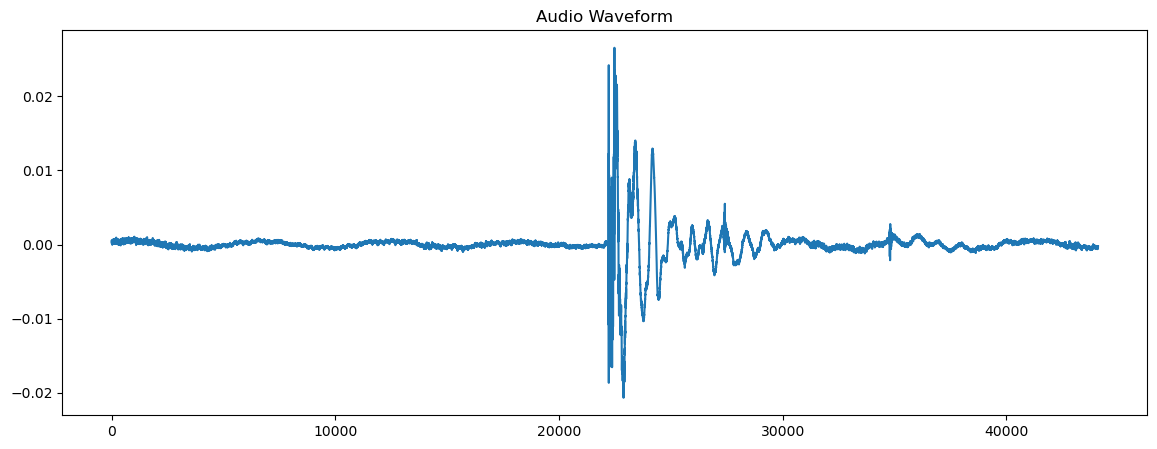

In [56]:
plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.title('Audio Waveform')
plt.show()

Beim Visualisieren einer einfachen Aufnahme wird die charakteristische Struktur eines Tastenanschlags deutlich sichtbar. Im Zentrum der Grafik zeigt sich ein markantes Maximum bei ungefähr 22.000, welches den eigentlichen Tastenanschlag repräsentiert. Interessanterweise ist zu erkennen, dass bereits vor dem Tastenanschlag ein leichtes Rauschen vorhanden ist, welches auf die Umgebungsgeräusche des Raums zurückzuführen ist. Nach dem Tastenanschlag ist eine Schwingung sichtbar, die sich bis etwa zwei Drittel der Grafik erstreckt. Dies könnte sowohl vom Nachhall der Taste selbst als auch von der gesamten Tastatur herrühren. Die gesamte Aufnahme erstreckt sich über eine Sekunde, und da mit einer Sample-Rate von 44 kHz aufgezeichnet wurde, werden in der Grafik insgesamt 44.000 Samples dargestellt.

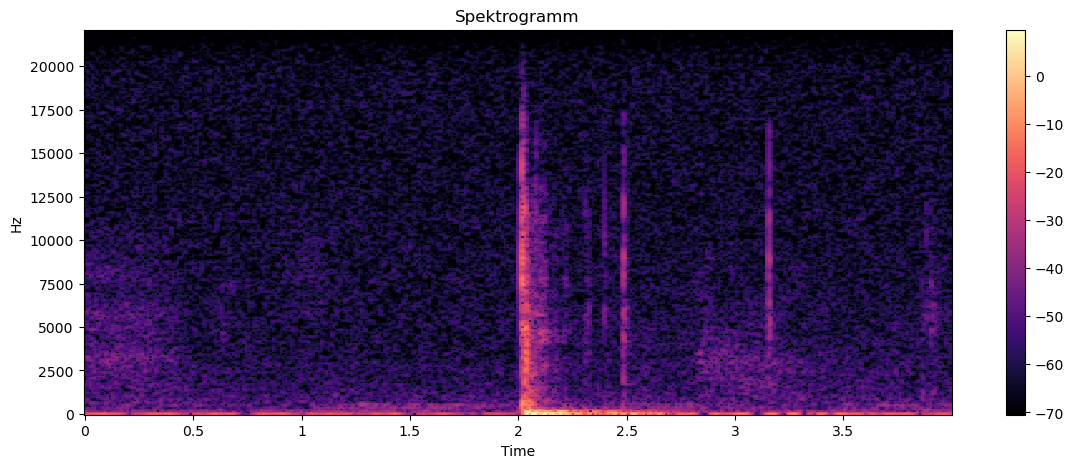

In [57]:
X = librosa.stft(audio, n_fft=512)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spektrogramm')
plt.show()

Das obere Bild präsentiert das gleiche Signal, jedoch dargestellt im Frequenzbereich über die Zeit mittels der short-Time Fourier Transform (stft). Auch hier ist deutlich erkennbar, dass das Spektrogramm bei etwa t=0.5 Sekunden heller wird. Dieser helle Bereich im Spektrogramm markiert den Moment des Tastenanschlags, was auf eine erhöhte Energie in bestimmten Frequenzbändern zu diesem Zeitpunkt hinweist. Die Helligkeit im Spektrogramm reflektiert eine Intensivierung der Frequenzanteile, die typischerweise mit dem akustischen Ereignis eines Tastenanschlags einhergeht.

Laden aller Audiodateien und Labels:

In [58]:
base_path = './classes_2'  # Basispfad zur Audiodateien
classes = os.listdir(base_path)  # Liste der Klassennamen

data = []  # Liste zum Speichern der Audiodaten
labels = []  # Liste zum Speichern der zugehörigen Labels

for class_label in classes:
    class_path = os.path.join(base_path, class_label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                audio, sr = librosa.load(file_path, sr=None)  # Laden der Audiodatei
                audio = audio / np.max(np.abs(audio))  # Normalisierung
                data.append(audio)
                labels.append(class_label)
                
print(f"Data matrix shape: {len(data)} x {len(data[0])}")

Data matrix shape: 1722 x 44100


Insgesamt wurden 1.700 Aufzeichnungen geladen, wobei jede Aufzeichnung aus 44.000 Datenpunkten besteht. Jede Aufzeichnung wird einer bestimmten Klasse zugeordnet, die in der Variable `classes` gespeichert ist.

In [59]:
print(classes)
print(f"Classes found: {len(classes)}")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'backspace', 'ctrl', 'd', 'down', 'e', 'enter', 'esc', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'z', 'ß']
Classes found: 39


Es ist auffällig, dass einige Klassen vorhanden sind, die nicht ins Raster passen. Diese wurden während der Aufzeichnungen fälschlicherweise erzeugt.

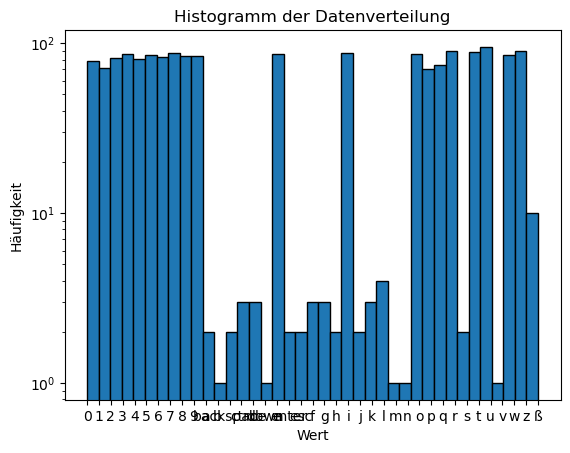

In [60]:
plt.hist(labels, edgecolor='black',bins=len(classes), log=True)
plt.title('Histogramm der Datenverteilung')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

Im folgenden Schritt werden nur die relevanten Klassen berücksichtigt und die anderen Klassen herausgefiltert. In diesem Fall sind die relevanten Klassen `['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'q', 'r', 'e', 'i', 'o', 'p', 't', 'u', 'w', 'z']`. 

In [61]:
relevant_classes =['0', '1', '2', '3', '4','5', '6', '7', '8', '9','q', 'r', 'e', 'i', 'o', 'p', 't', 'u', 'w', 'z']

data = []  # Liste zum Speichern der Audiodaten
labels = []  # Liste zum Speichern der zugehörigen Labels
## geht über alle Audiodaten und speichert die Daten welche in relevant_classes vorkommen.
for class_label in relevant_classes:
    class_path = os.path.join(base_path, class_label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                audio, sr = librosa.load(file_path, sr=None)  # Laden der Audiodatei
                audio = audio / np.max(np.abs(audio))  # Normalisierung
                data.append(audio)
                labels.append(class_label)


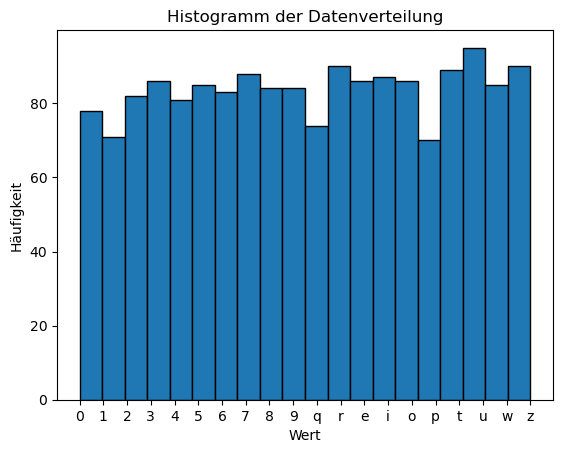

In [62]:
plt.hist(labels, edgecolor='black', bins=len(relevant_classes))
plt.title('Histogramm der Datenverteilung')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

In [63]:
print(f"\"u\" kommt {labels.count('u')} vor.")
print(f"{len(labels)} Labels insgesamt")
print(f"Basline: {labels.count('u')/len(labels)*100:.2f} % ")

"u" kommt 95 vor.
1674 Labels insgesamt
Basline: 5.68 % 


Um die Forschungsfrage zu beantworten, ob ein Computer anhand des Geräusches einer Taste auf einer Computer-Tastatur erkennen kann, um welche Taste es sich handelt, selbst wenn sich die Tasten nur in ihrer Position auf der Tastatur und nicht in ihrer Form unterscheiden, ist es notwendig, eine Baseline zu definieren. Diese Baseline dient als Vergleichsmaßstab, um die Leistungsfähigkeit des künstlichen neuronalen Netzes gegenüber einem naiven Algorithmus oder einem Zufallsgenerator zu bewerten. Bei insgesamt 20 vorhandenen Klassen und unter Berücksichtigung, dass die Klasse u mit 95 Vorkommen am häufigsten auftritt, lässt sich die Baseline für eine zufällige Auswahl auf 5.68 % festlegen. Diese Zahl ergibt sich aus dem Verhältnis der häufigsten Klasse (u) zur Gesamtzahl der Samples (1674), was bedeutet, dass ein zufällig wählender Algorithmus mit einer Wahrscheinlichkeit von 5.68 % korrekt klassifizieren würde, wenn er stets die am häufigsten vorkommende Klasse auswählt. Ein künstliches neuronales Netzwerk muss diese Baseline übertreffen, um als besser als ein naiver Ansatz oder Zufall zu gelten.

## Datenvorbereitung

Im folgenden Codeabschnitt wird überprüft, ob alle Datensätze die gleiche Länge aufweisen. Diese Überprüfung ist notwendig, um sicherzustellen, dass die Eingangsdaten für das Netzwerk eine einheitliche Länge haben.

In [64]:
# Check if all data has the same legnth
leng_data= len(data[0])
for i in data:
    if len(i)!=leng_data:
        print(i)    

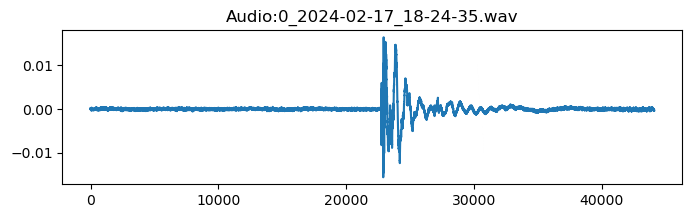

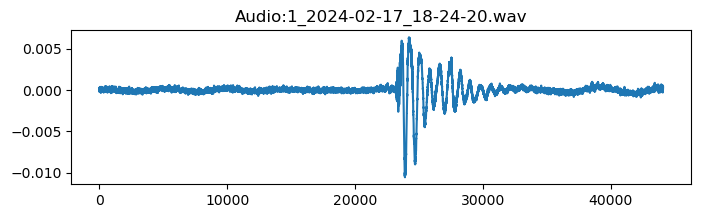

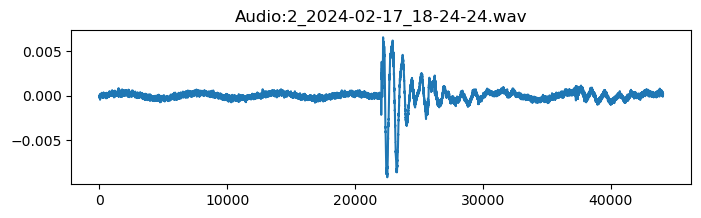

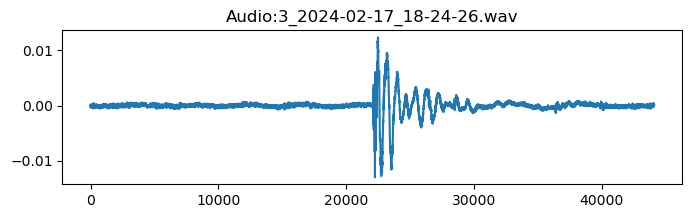

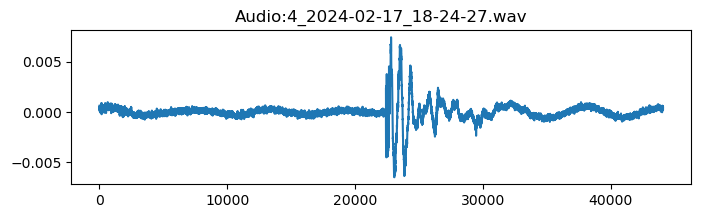

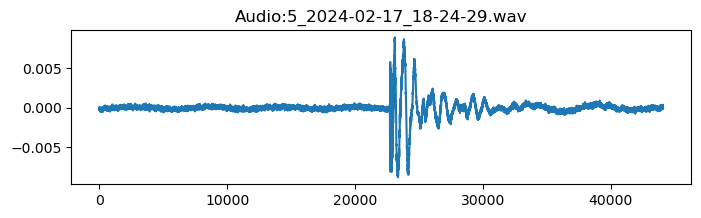

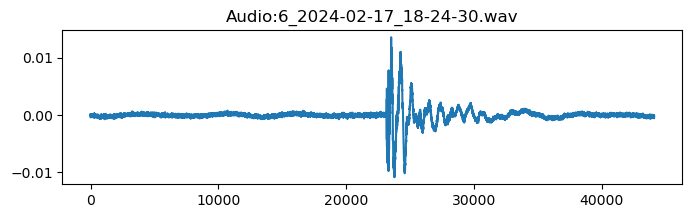

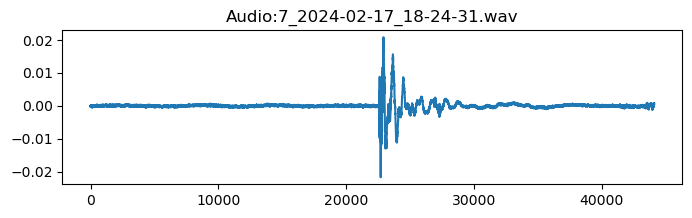

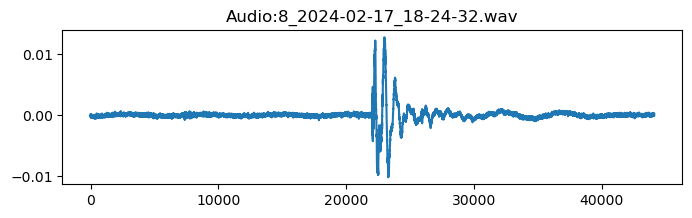

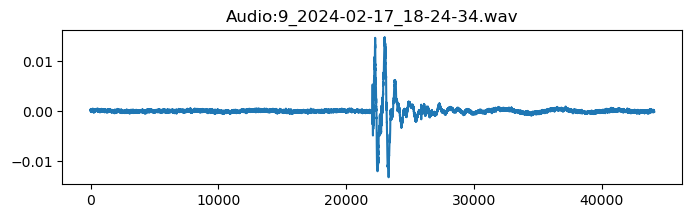

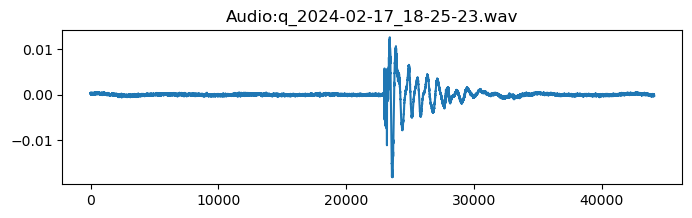

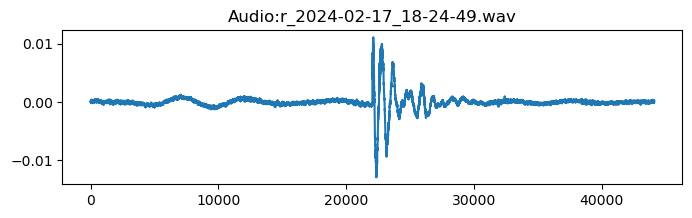

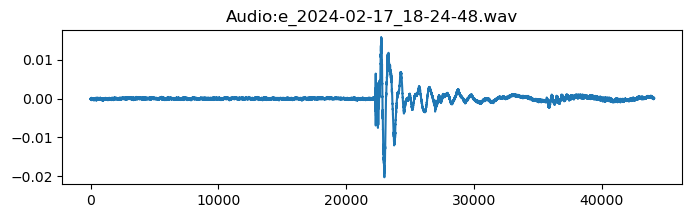

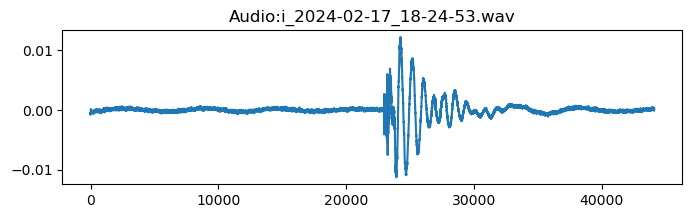

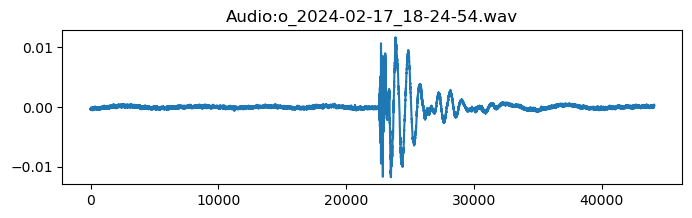

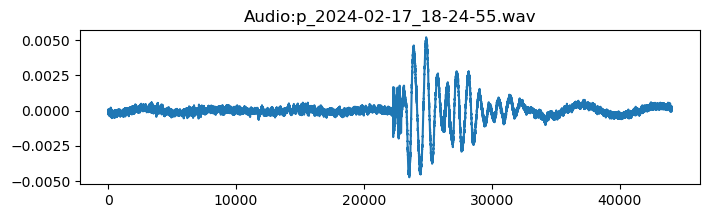

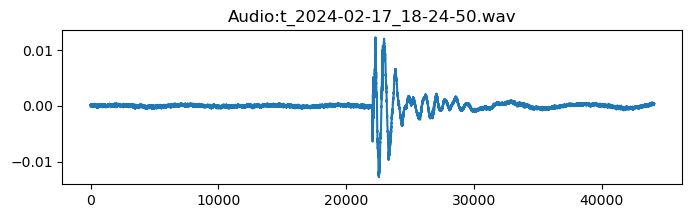

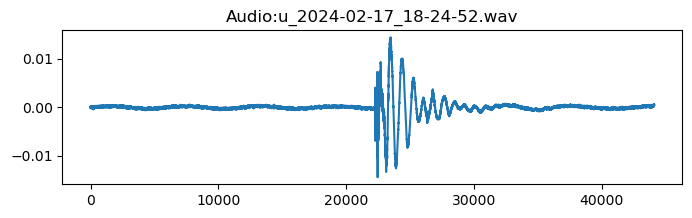

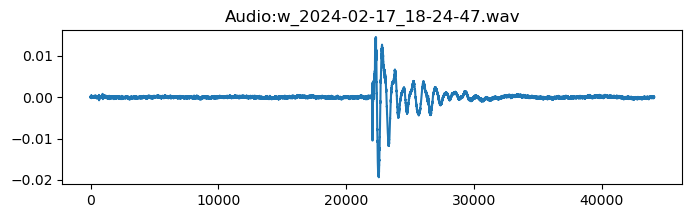

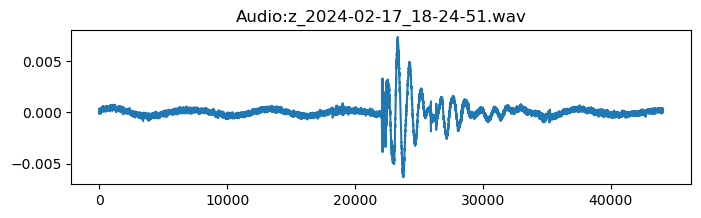

In [65]:
from sklearn.preprocessing import StandardScaler
for cli, i in enumerate(relevant_classes):
    subfolder = "./classes_2/" + i
    wav = os.listdir(subfolder)[0]
    audio, sr = librosa.load(subfolder + "/" + wav, sr=None)
    plt.figure(figsize=(8, 2))
    plt.plot(audio)
    plt.title('Audio:' + wav)
plt.show()
    


### Extraktion der Region of Interest (ROI)

In den oben vorgestellten Diagrammen, die für jede Klasse erstellt wurden, ist auffällig, dass die wesentlichen Aktivitäten hauptsächlich in der Mitte und im hinteren Bereich des Zeitrahmens stattfinden. Der Bereich vor dem Tastenanschlag sollte für die Analyse nicht relevant sein. Daher liegt unser Hauptinteresse im Bereich zwischen 20.000 und 30.000 Datenpunkten. Aus diesem Grund werden wir die ersten 15.000 und letzten 8000 Datenpunkte entfernen, um uns auf den relevantesten Abschnitt des Signals zu konzentrieren. Diese Vorgehensweise ermöglicht eine fokussierte Analyse der signifikanten Merkmale des Tastenanschlags, indem irrelevante Daten, die vor und nach dem eigentlichen Ereignis liegen, ausgeschlossen werden.

In [66]:
trimmed_data = [array[15000:-8000] for array in data]
print(np.shape(trimmed_data))

(1674, 21100)


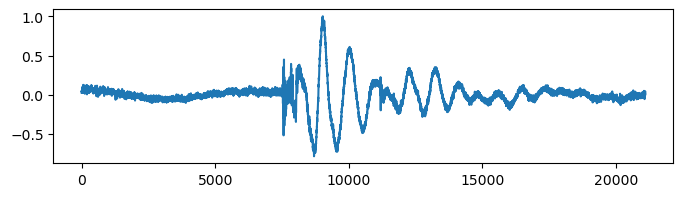

In [108]:
plt.figure(figsize=(8, 2))
plt.plot(trimmed_data[2])
plt.show()

Im oberen Diagramm wird die Länge des Signals nach dem Kürzen dargestellt. Dieses Diagramm visualisiert die verbleibende Sequenz des Audiosignals, die sich nun auf den Bereich zwischen 15.000 und 36.100 Datenpunkten konzentriert, nachdem die ersten 15.000 und letzten 8000 Punkte entfernt wurden. Das Enderegbnis der Daten ist eine 1674 x 21100 Matrix 

### Daten-Augmentation

Um dem Overfitting entgegenzuwirken, ist es essenziell, über eine möglichst große und vielfältige Datenmenge zu verfügen. Dies kann entweder durch die Aufzeichnung neuer Daten mit höherer Varianz erreicht werden oder durch den Einsatz von Daten-Augmentation-Techniken. Daten-Augmentation ist ein leistungsfähiger Ansatz, um die Diversität des Trainingsdatensatzes künstlich zu erhöhen, ohne dass zusätzliche echte Daten aufgezeichnet werden müssen. Hierbei werden bestehende Daten modifiziert oder transformiert, um neue Varianten zu erzeugen. Dies kann durch verschiedene Methoden erfolgen, wie z.B. das Hinzufügen von Rauschen, die Anwendung von Zeitdehnung oder -kompression oder Pitch-Modifikation der Audiosignale. Durch diese Techniken wird das Modell robuster gegenüber kleinen Variationen in den Eingangsdaten und hilft, Overfitting zu reduzieren, indem es auf einer breiteren Basis von Trainingsbeispielen lernt.

In [69]:
# Augmentations-Pipeline mit Rauschen Pitch-shift und shift
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.010, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.1, max_shift=0.1, p=0.5),
])
# Anwendung der Pipeline auf alle Daten
augmented_samples_list = []
for sample in trimmed_data:    
    augmented_sample = augment(samples=sample, sample_rate=len(trimmed_data[0]))
    augmented_samples_list.append(augmented_sample)

Im unteren Bild wird dargestellt, wie sich die Daten-Augmentation auf den ersten Datensatz ausgewirkt hat. Dieses Visualisierung zeigt die Veränderungen des ursprünglichen Audiosignals nach der Anwendung verschiedener Augmentationstechniken.

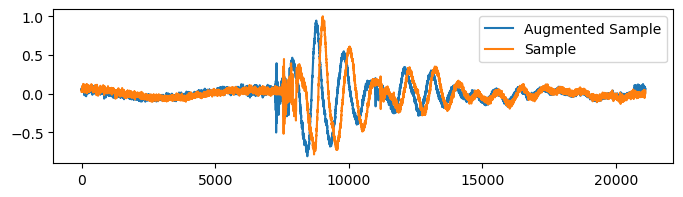

In [107]:
plt.figure(figsize=(8, 2))
plt.plot(augmented_samples_list[2], label='Augmented Sample')
plt.plot(trimmed_data[2], label='Sample')
plt.legend()
plt.show()

Um die Datenmenge zu erhöhen, werden die augmentierten Daten den ursprünglichen Daten hinzugefügt, wodurch sich die Gesamtmenge der verfügbaren Daten effektiv verdoppelt. 

In [71]:
training_data = trimmed_data + augmented_samples_list
# verhindert, dass bei jede Ausführung die Labels addiert werden.
if len(labels) != len(training_data):
    labels_train = labels + labels
len(training_data)

3348

Die Funktion EarlyStopping ist ein effektives Mittel, um Overfitting vorzubeugen und gleichzeitig sicherzustellen, dass keine unnötigen Trainingszyklen durchgeführt werden. Durch die frühzeitige Beendigung des Trainings, sobald sich die Leistung auf einem Validierungsset nicht mehr signifikant verbessert, kann man sicherstellen, dass das Modell die bestmögliche Leistung erzielt, ohne dabei übermäßig an die Trainingsdaten angepasst zu sein. Im folgenden Codeabschnitt wird die EarlyStopping-Funktion konfiguriert, um das Training abzubrechen, wenn der Validierungsverlust über eine definierte Anzahl von Epochen hinweg nicht um mindestens 0,01 sinkt:

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min', restore_best_weights=True)

[Librosa](https://github.com/librosa/librosa) ist eine umfangreiche Python-Bibliothek für die Analyse von Musik und Audiodaten. Sie bietet vielfältige Funktionen zur Extraktion von Merkmalen aus Audiodateien, unter anderem die Möglichkeit, Mel-Frequency Cepstral Coefficients (MFCCs) zu berechnen. MFCCs sind Koeffizienten, die zusammen das Mel-Frequency Cepstrum (MFC) bilden, eine Repräsentation des Kurzzeit-Leistungsspektrums eines Klangs. Diese Repräsentation basiert auf einer linearen kosinusförmigen Transformation der logarithmierten Leistungsspektren, kalibriert an der Mel-Skala. Die Mel-Skala ist eine perzeptive Skala der Tonhöhenempfindung des menschlichen Gehörs, die Frequenzen in einer Weise ordnet, die der tatsächlichen auditiven Wahrnehmung entspricht. Sie schreibt den für Menschen hörbaren Frequenzen unterschiedliche Bedeutungen zu, wobei niedrige Frequenzen genauer und höhere Frequenzen komprimierter dargestellt werden. Diese Skalierung ist darauf ausgelegt, die menschliche Hörwahrnehmung präziser abzubilden[^1][^2].   

Die Berechnung von MFCCs umfasst im Wesentlichen die folgenden Schritte[^1]:


![Prozess zur Erstellung MFCC features](./etc/MFC-Transformation-process.drawio.png)


[^1]:Logan, Beth. (2000). Mel Frequency Cepstral Coefficients for Music Modeling. Proc. 1st Int. Symposium Music Information Retrieval.  https://ismir2000.ismir.net/papers/logan_paper.pdf 

[^2]:McFee, Brian, Colin Raffel, Dawen Liang, Daniel PW Ellis, Matt McVicar, Eric Battenberg, and Oriol Nieto. "librosa: Audio and music signal analysis in python." In Proceedings of the 14th python in science conference, pp. 18-25. 2015

In [73]:
features_list = []
for sample in training_data:
    # MFCC-Feature-Extraktion
    # n_mfcc Koeffizienten/Merkmale pro Fenster
    mfccs = librosa.feature.mfcc(y=sample, sr=len(training_data[0]), n_mfcc=13)
    features_list.append(mfccs)

In [74]:
np.shape(features_list)

(3348, 13, 42)

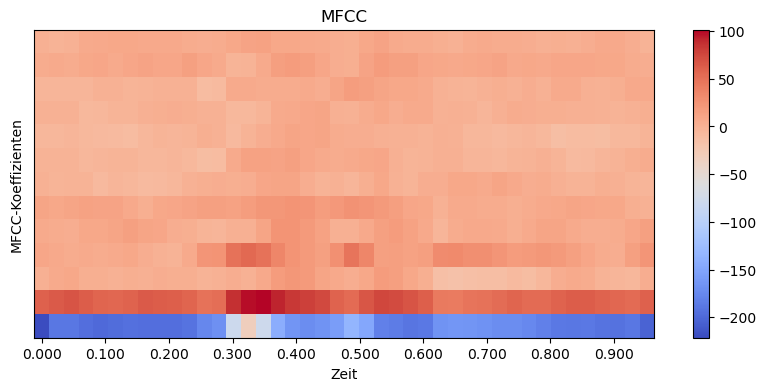

In [75]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(features_list[1], x_axis='time', n_fft=512)
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Zeit')
plt.ylabel('MFCC-Koeffizienten')
plt.show()

Im folgenden Codeausschnitt wird demonstriert, wie die Daten für das Training vorbereitet und zwischen Trainings- und Validierungsdaten aufgeteilt werden:

In [76]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels_train)
X = np.array(features_list) 
y = to_categorical(encoded_labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Im untenstehenden Code wird die Weights & Biases-Sitzung initialisiert und die Architektur des Netzwerks definiert. Dies hilft beim Protokollieren und Vergleichen verschiedener Architekturen:

In [77]:
# start a new wandb
dense = 256 #
filter1 = 32
filter2 = 128
kern1 = 5 # 
kern2 = 5
learning_rate = 0.005
epochs = 100 #
batch = 32
pool1 = 10
pool2 = 8
momentum = 0.5
optimizer= "adam"
wandb.init(
    # set the wandb project where this run will be logged
    project="AAI-Final-Projekt_5",
    # track hyperparameters and run metadata
    config={
    "model":"Frequence",
    "pool1":pool1,
    "pool2":pool2,
    "learning_rate": learning_rate,
    "hidden-CNN-Layer": 2,
    "dropout":4,
    "filter1":filter1,
    "filter2":filter2,
    "Kernel1":kern1,
    "Kernel2":kern2,
    "dropout-values:": 0.3,
    "dataset": "self_made",
    "Activation_function": "relu",
    "patience":"9",
    "epochs": epochs,
    "optimizer": optimizer,
    "loss_function": "categorical_crossentropy",
    "batch_size":batch,
    "test_size":0.3,
    "Dense":dense,
    }
)

Im nächsten Schritt wird die Architektur des Netzes definiert. Für die Implementierung wurde eine Architektur ausgewählt, die Schichten konvolutioneller neuronaler Netze (CNNs) nutzt, um Merkmale aus den Eingabedaten effektiv zu extrahieren und zu lernen. Diese Architektur ist besonders geeignet für Aufgaben der Bild- und Mustererkennung. Die gewählte Architektur verwendet L2-Regularisierung mit einem Regularisierungsfaktor von l2_reg = 0.001 zur Vermeidung von Overfitting.

In [78]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers

l2_reg = 0.001

model_2 = Sequential()
model_2.add(Conv2D(filters=filter1, kernel_size=(kern1, kern1), input_shape=(len(X_train[0]), len(X_train[0][0]), 1), activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))
model_2.add(Conv2D(filters=filter2, kernel_size=(kern2, kern2), activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_reg)))
model_2.add(AveragePooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(Dense(dense, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
model_2.add(Dropout(0.4))
model_2.add(Dense(len(relevant_classes), activation='softmax', kernel_regularizer=regularizers.l2(l2_reg)))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 38, 32)         832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 19, 32)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 4, 19, 32)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 19, 128)        102528    
                                                                 
 average_pooling2d_1 (Avera  (None, 2, 9, 128)         0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

Diese Architektur beginnt mit einem konvolutionellen Layer, gefolgt von Max-Pooling, um die räumlichen Daten zu komprimieren und gleichzeitig die wichtigsten Merkmale zu bewahren. Ein Dropout-Layer wird nach dem Pooling eingefügt, um das Risiko von Overfitting weiter zu reduzieren. Danach folgt eine weitere Schicht aus konvolutionellen Neuronen und Durchschnittspooling, um die Merkmalsextraktion fortzusetzen. Nach dem Abflachen der Datenstruktur werden zwei voll verbundene Schichten hinzugefügt, um die Klassifizierung basierend auf den extrahierten Merkmalen durchzuführen. Dropout-Schichten nach jeder Dense-Schicht reduzieren zusätzlich das Overfitting, bevor die letzte Dense-Schicht die Klassifizierungen mit einer Softmax-Aktivierungsfunktion vornimmt, die Wahrscheinlichkeiten für jede Klasse ausgibt.

### Verlustfunktion und Training
Im nächsten Schritt erfolgt die sorgfältige Auswahl und Definition der Verlustfunktion, gefolgt vom Beginn des Trainingsprozesses. Die Wahl der Verlustfunktion ist entscheidend, da sie den Grad der Abweichung zwischen den vorhergesagten Ausgaben des Modells und den tatsächlichen Zielwerten misst.

In [80]:
lrate = learning_rate
decay = lrate/epochs
if optimizer == "adam":
    opt = Adam(lr=1e-4)
else:
    opt = SGD(learning_rate=lrate, momentum=momentum, nesterov=False)
    
model_2.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

history_2=model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch, callbacks=[early_stopping])
model_2.save("./Modell/audio_classifyer_adam")

Epoch 1/100



74/74 [==============================] - 5s 39ms/step - loss: 4.0864 - accuracy: 0.0495 - val_loss: 3.4970 - val_accuracy: 0.0567
Epoch 2/100
74/74 [==============================] - 2s 31ms/step - loss: 3.4792 - accuracy: 0.0589 - val_loss: 3.4484 - val_accuracy: 0.0498
Epoch 3/100
74/74 [==============================] - 2s 32ms/step - loss: 3.4397 - accuracy: 0.0542 - val_loss: 3.4152 - val_accuracy: 0.0667
Epoch 4/100
74/74 [==============================] - 3s 35ms/step - loss: 3.3964 - accuracy: 0.0576 - val_loss: 3.3626 - val_accuracy: 0.0746
Epoch 5/100
74/74 [==============================] - 3s 34ms/step - loss: 3.3588 - accuracy: 0.0615 - val_loss: 3.3351 - val_accuracy: 0.0667
Epoch 6/100
74/74 [==============================] - 2s 31ms/step - loss: 3.3250 - accuracy: 0.0576 - val_loss: 3.2855 - val_accuracy: 0.0905
Epoch 7/100
74/74 [==============================] - 2s 30ms/step - loss: 3.2684 - accuracy: 0.0781 - val_loss: 3.2295 - val_accuracy: 0.0866
Epoch 8/100
74/74 

INFO:tensorflow:Assets written to: ./Modell/audio_classifyer_adam\assets


In [81]:
for tl,vl in zip(history_2.history['loss'],history_2.history['val_loss']):
    wandb.log({"loss_train": tl, "loss_valid": vl})#

for ta,va in zip(history_2.history['accuracy'],history_2.history['val_accuracy']):
    wandb.log({"accuracy": ta, "val_accuracy": va})

In [82]:
loss,acc = model_2.evaluate(X_train, y_train, verbose=0)
print("Accuracy on Test Data : %.2f%%" % (acc*100))

Accuracy on Test Data : 94.79%


In [83]:
loss,acc = model_2.evaluate(X_val, y_val, verbose=0)
print("Accuracy on Validation Data : %.2f%%" % (acc*100))

Accuracy on Validation Data : 46.37%


In der vorliegenden Untersuchung werden die Trainings- und Validierungsgenauigkeit sowie der Trainings- und Validierungsverlust eingehend analysiert und visualisiert. Aus der Analyse der resultierenden Kurvenverläufe lässt sich erkennen, dass ab der 30. Epoche deutliche Anzeichen von Overfitting auftreten. Diese Manifestation von Overfitting ist besonders daran erkennbar, dass der Validierungsverlust keine weitere Abnahme verzeichnet, während der Trainingsverlust weiterhin fällt. Eine vergleichbare Diskrepanz offenbart sich bei der Gegenüberstellung von Trainings- und Validierungsgenauigkeit.

Um der Überanpassung entgegenzuwirken, wird in diesem Kontext die Methode des Early Stoppings angewandt. Diese Strategie beinhaltet den Abbruch des Trainingsprozesses, sobald der Validierungsverlust über eine definierte Anzahl von Epochen hinweg keine Verbesserung mehr erfährt. Der Einsatz von Early Stopping zielt darauf ab, die Generalisierungsfähigkeit des Modells zu stärken und das Risiko einer Überanpassung zu minimieren. In dieser Implementierung wurde das Early Stopping relativ spät eingesetzt um die Möglichkeiten des Netzes zu Visualisieren.

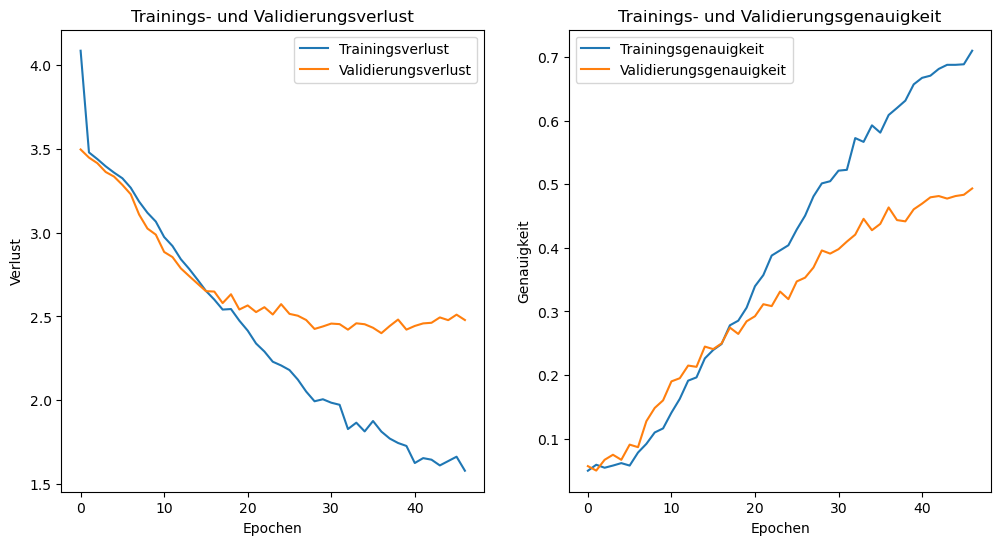

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Trainingsverlust')
plt.plot(history_2.history['val_loss'], label='Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()

# Plot für Trainings- und Validierungsgenauigkeit
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history_2.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()

plt.show()

Es ist jedoch erkennbar, dass eine Genauigkeit von über 45 % erreicht werden kann, ohne dass das Modell in Overfitting verfällt.

In [85]:
predictions = model_2.predict(X_val)

32/32 [==============================] - 1s 8ms/step


Im nächsten Schritt werden die Daten für die Erstellung der Confusion Matrix vorbereitet. Dies geschieht, indem die Wahrscheinlichkeiten, die aus der Softmax-Ausgabe des Modells stammen, in ein Array transformiert werden, in dem nur die höchsten Wahrscheinlichkeiten relevant sind. Konkret bedeutet das, dass für jede Vorhersage nur die Klasse mit der höchsten vorhergesagten Wahrscheinlichkeit berücksichtigt wird.

In [101]:
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_val, axis=1)

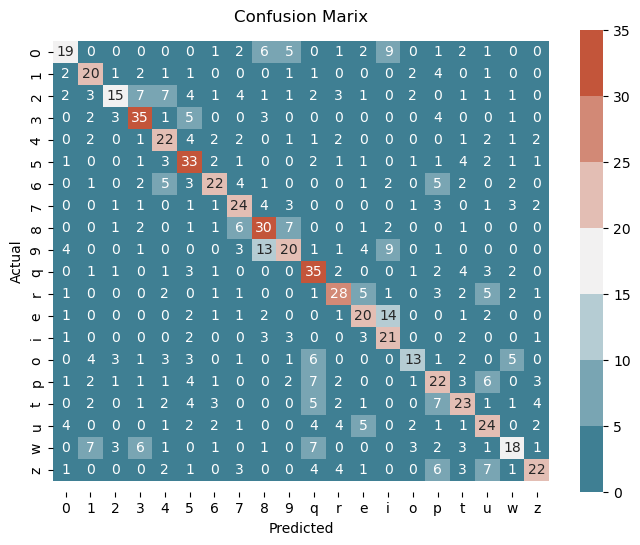

In [102]:
# Funktion um die Confusion Marix zu plotten
def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(8, 6)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )
  plt.title("Confusion Marix")
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() 
plot_cm(actual_classes, predicted_classes, relevant_classes)

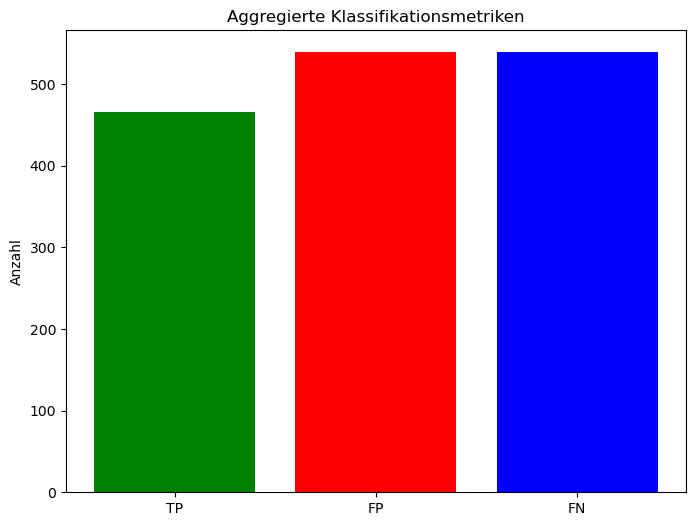

In [104]:
cm = confusion_matrix(actual_classes, predicted_classes)

# Berechnung von TP, FP, FN
TP = np.sum(np.diag(cm))
FP = np.sum(cm, axis=0) - np.diag(cm)
FN = np.sum(cm, axis=1) - np.diag(cm)

# Aggregierte FP und FN
total_FP = np.sum(FP)
total_FN = np.sum(FN)

# Visualisierung
values = [TP, total_FP, total_FN]
labels = ['TP', 'FP', 'FN']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red', 'blue'])
plt.title('Aggregierte Klassifikationsmetriken')
plt.ylabel('Anzahl')
plt.show()


In [ ]:
wandb.finish()

## Auswertung

Aus der Konfusionsmatrix ist deutlich ersichtlich, dass das neuronale Netzwerk in der Lage ist, die Tastenanschläge zu erkennen, auch wenn die Genauigkeit noch nicht auf einem sehr hohen Niveau ist. Die Baseline von mindestens 5,6 % wurde vom Netzwerk um einen Faktor 10 übertroffen, was auf die beachtliche Leistungsfähigkeit des Netzwerks hinweist. Damit kann die Forschungsfrage "Kann ein Computer anhand des Geräusches einer Taste auf einer Computer-Tastatur erkennen, um welche Taste es sich handelt, auch wenn sich die Tasten lediglich in ihrer Position auf der Tastatur und nicht in ihrer Form unterscheiden?" positiv beantwortet werden.

Trotz dieser positiven Erkenntnis ist die Leistung des Netzwerks noch nicht vollständig zufriedenstellend, da deutliche Anzeichen von Overfitting erkennbar sind – die Trainingsgenauigkeit liegt bei 77 %, während die Validierungsgenauigkeit bei 50 % liegt. Diese Diskrepanz zwischen Trainings- und Validierungsgenauigkeit deutet darauf hin, dass das Modell zu spezifisch auf die Trainingsdaten angepasst ist und nicht optimal auf neuen, unbekannten Daten generalisiert. Zukünftige Arbeitsschritte sollten daher darauf abzielen, Maßnahmen gegen das Overfitting zu verstärken, etwa durch weitere Daten-Augmentation, die Anwendung von Regularisierungstechniken oder die Anpassung der Netzwerkarchitektur, um die Generalisierungsfähigkeit des Modells zu verbessern und die Validierungsgenauigkeit zu steigern.

### Nachzuvollziehbarkeit des Netzes

Die Unmöglichkeit, die Entscheidungen des Netzwerks vollständig nachzuvollziehen, ist eine der Herausforderungen beim Einsatz von tiefen neuronalen Netzwerken, insbesondere in komplexen Klassifizierungsaufgaben. Die Fähigkeit des Netzwerks, Tastenanschläge zu klassifizieren, ohne dass die Zeit, die der Schall benötigt, um vom Ursprung zum Mikrofon zu gelangen, als Faktor berücksichtigt wird, unterstreicht die Fähigkeit des Modells, subtile Unterschiede im Klangprofil der Tastenanschläge zu erkennen. Die Variation in der Positionierung des Mikrofons während der Datenaufnahme hilft dabei, die Abhängigkeit der Klassifizierungsergebnisse von der Schallausbreitungszeit zu minimieren.

Die Hypothese, dass die Abnutzung der Tastatur und die daraus resultierenden unterschiedlichen Klangprofile der Tasten einen Einfluss auf die Klassifizierung haben könnten, ist plausibel. Unterschiedliche Abnutzungsgrade können zu variierenden Klangsignaturen führen, die vom Netzwerk erlernt und zur Klassifizierung genutzt werden könnten. Um diese Annahme weiter zu untersuchen und die Robustheit des Modells zu evaluieren, wäre es sinnvoll, den Versuch mit einer größeren Anzahl an Tastaturen durchzuführen, einschließlich brandneuer Tastaturen, um die Variabilität in den Klangprofilen zu erhöhen. Dadurch könnte besser verstanden werden, inwieweit die physische Beschaffenheit und der Abnutzungsgrad der Tastaturen die Klassifizierungsergebnisse beeinflussen und ob das Modell in der Lage ist, konsistente Klassifizierungen über ein breites Spektrum von Tastaturen hinweg zu liefern

# Teil II: Klassifizierung von Tastaturtasten anhand ihrer Form

Im zweiten Teil dieser Arbeit konzentrieren wir uns auf die Fragestellung, inwieweit ein Computer in der Lage ist, Tasten einer Tastatur mit verschidenen Formen anhand deren Geräusch zu klassifizieren.

Dabei werden die Zwei Ansätze angegangen
1. **Direktes Training eines Convolutional Neural Networks (CNN) mit minimal vorverarbeiteten Daten:**
2. **Transformation der Trainingsdaten in den Frequenzbereich/ Berechnung der MFCCs und Training eines CNN-Klassifizierungsnetzwerks:** 

In [109]:
import os


base_path = './classes_lw'  # Basispfad zu Ihren Audiodateien
classes = os.listdir(base_path)  # Liste der Klassennamen

data = []  # Liste zum Speichern der Audiodaten
labels = []  # Liste zum Speichern der zugehörigen Labels

for class_label in classes:
    class_path = os.path.join(base_path, class_label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                audio, sr = librosa.load(file_path, sr=None)  # Laden der Audiodatei
                audio = audio / np.max(np.abs(audio))  # Normalisierung
                data.append(audio)
                labels.append(class_label)

In [110]:
print(f"Data matrix shape: {np.shape(data)}")

Data matrix shape: (1055, 44100)


In [111]:
classes

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'enter', 'esc', 'shift', 'space']

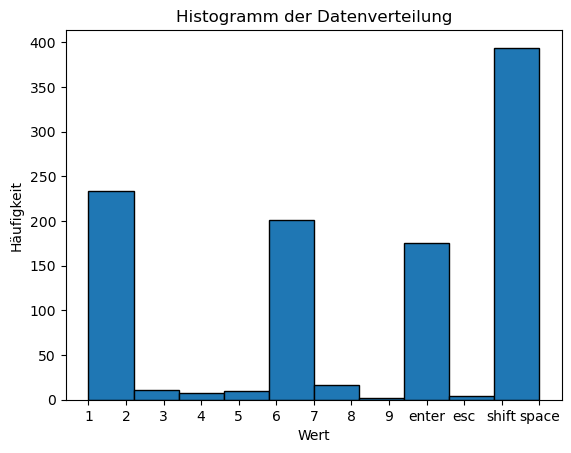

In [112]:
plt.hist(labels, edgecolor='black')
plt.title('Histogramm der Datenverteilung')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

In [113]:
relevant_classes = ['1','6','shift','space','enter']

data = []  # Liste zum Speichern der Audiodaten
labels = []  # Liste zum Speichern der zugehörigen Labels

for class_label in relevant_classes:
    class_path = os.path.join(base_path, class_label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                audio, sr = librosa.load(file_path, sr=None)  # Laden der Audiodatei
                audio = audio / np.max(np.abs(audio))  # Normalisierung
                data.append(audio)
                labels.append(class_label)

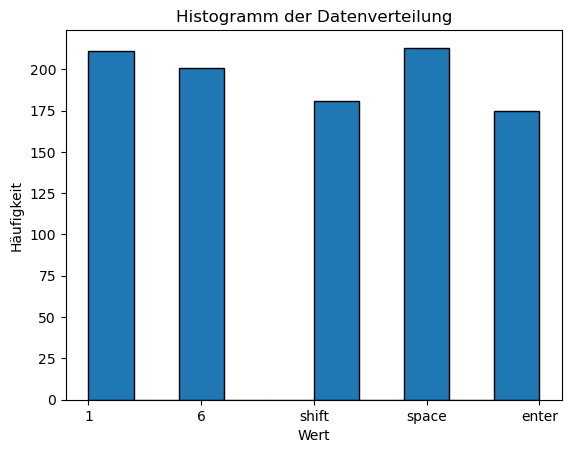

In [114]:
plt.hist(labels, edgecolor='black')
plt.title('Histogramm der Datenverteilung')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

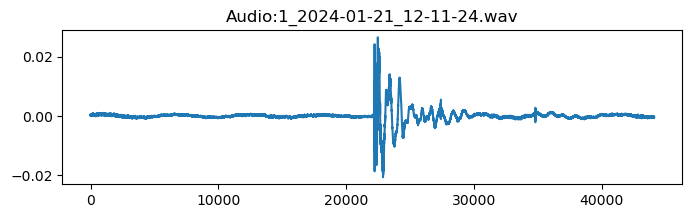

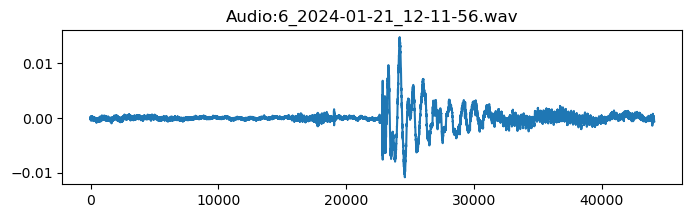

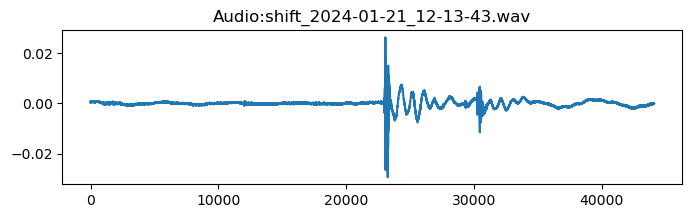

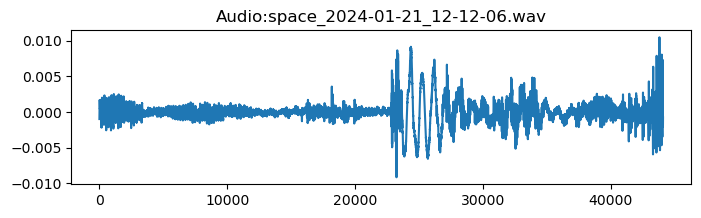

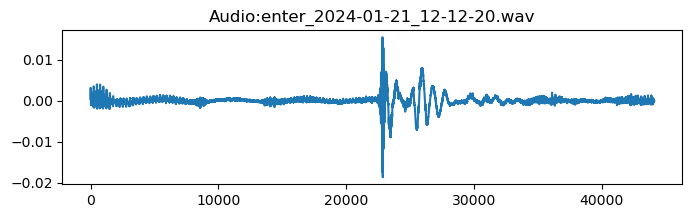

In [116]:
from sklearn.preprocessing import StandardScaler
for cli, i in enumerate(relevant_classes):
    subfolder = "./classes_lw/" + i
    wav = os.listdir(subfolder)[0]
    audio, sr = librosa.load(subfolder + "/" + wav, sr=None)
    plt.figure(figsize=(8, 2))
    plt.plot(audio)
    plt.title('Audio:' + wav)
plt.show()


In [117]:
trimmed_data = [array[15000:-8000] for array in data]
print(len(trimmed_data),len(trimmed_data[0]) )

981 21100


In [118]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.010, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.1, max_shift=0.1, p=0.5),
])

augmented_samples_list = []

for sample in trimmed_data:    
    augmented_sample = augment(samples=sample, sample_rate=len(trimmed_data[0]))
    augmented_samples_list.append(augmented_sample)

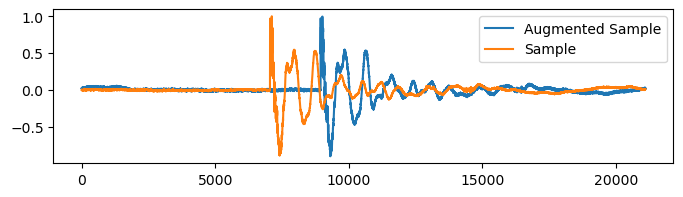

In [121]:
plt.figure(figsize=(8, 2))
plt.plot(augmented_samples_list[2], label='Augmented Sample')
plt.plot(trimmed_data[2], label='Sample')
plt.legend()
plt.show()

## Ansatz I :Direktes Training eines CNN mit minimal vorverarbeiteten Daten:

In [126]:
training_data = trimmed_data + augmented_samples_list
if len(labels) != len(training_data):
    labels_train = labels + labels
len(labels)

981

Im untenstehenden Code wird die Weights & Biases-Sitzung erneut initialisiert und die Architektur des Netzwerks definiert:

In [127]:
# start a new wandb run to track this script
dense = 256 #
filter1 = 32
filter3 = 64
filter2 = 128
filter4 = 256 
kern1 = 5 # 
kern2 = 5
learning_rate = 0.005
epochs = 64 #
batch = 32
pool1 = 10
pool2 = 8
pool3 = 8
pool4 = 0
wandb.init(
    # set the wandb project where this run will be logged
    project="AAI-Final-Projekt_5",
    # track hyperparameters and run metadata
    config={
    "pool1":pool1,
    "pool2":pool2,
    "pool3":pool3,
    "pool4":pool4,
    "learning_rate": learning_rate,
    "hidden-CNN-Layer": 4,
    "dropout":4,
    "filter1":filter1,
    "filter2":filter2,
    "filter3":filter3,
    "filter4":filter4,
    "Kernel1":kern1,
    "Kernel2":kern2,
    "dropout-values:": 0.3,
    "dataset": "self_made",
    "Activation_function": "relu",
    "patience":"9",
    "epochs": epochs,
    "optimizer": "SGD",
    "loss_function": "categorical_crossentropy",
    "batch_size":batch,
    "test_size":0.3,
    "Dense":dense,
    }
)

In [128]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels_train)
X = np.array(training_data) 
y = to_categorical(encoded_labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Im nächsten Schritt wird die Architektur des neuronalen Netzwerks konzipiert. Für die Implementierung wurde eine Architektur gewählt, die auf konvolutionellen neuronalen Netzwerken (CNNs) basiert, spezialisiert auf die Verarbeitung von 1D-Datensequenzen. Diese Architektur ist optimal geeignet für Aufgaben, die die Analyse und Klassifizierung von Zeitreihendaten oder eindimensionalen Signalen erfordern, wie sie beispielsweise in der Audioverarbeitung vorkommen.

Die ausgewählte Netzwerkarchitektur nutzt ReLU-Aktivierungsfunktionen für Nichtlinearität, durchschnittliche Pooling-Schichten (AveragePooling1D) zur Reduktion der Dimensionalität und zur Erhöhung der Modellrobustheit, sowie Dropout-Schichten zur Verringerung von Overfitting durch zufälliges Deaktivieren von Neuronen während des Trainings.

Nach den konvolutionellen und Pooling-Schichten wird eine Flatten-Schicht eingesetzt, um die Daten in einen eindimensionalen Vektor umzuwandeln, der durch voll verbundene Schichten (Dense) geführt wird, abschließend mit einer Softmax-Schicht, die die Klassifizierung vornimmt. 

In [129]:
model = Sequential()
model.add(Conv1D(filters=filter1, kernel_size=kern1, input_shape=(len(trimmed_data[0]), 1), activation='relu'))
model.add(AveragePooling1D(pool_size=pool1))
model.add(Dropout(0.2))
model.add(Conv1D(filters=filter2, kernel_size=kern1, activation='relu',padding='same'))
model.add(AveragePooling1D(pool_size=pool2))
model.add(Conv1D(filters=filter3, kernel_size=kern2, activation='relu',padding='same'))
model.add(AveragePooling1D(pool_size=pool3))
model.add(Dropout(0.4))
model.add(Conv1D(filters=filter4, kernel_size=kern2, activation='relu',padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(dense, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 21096, 32)         192       
                                                                 
 average_pooling1d_3 (Avera  (None, 2109, 32)          0         
 gePooling1D)                                                    
                                                                 
 dropout_10 (Dropout)        (None, 2109, 32)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 2109, 128)         20608     
                                                                 
 average_pooling1d_4 (Avera  (None, 263, 128)          0         
 gePooling1D)                                                    
                                                                 
 conv1d_6 (Conv1D)           (None, 263, 64)          

In [130]:
lrate = learning_rate
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=12, mode='min', restore_best_weights=True)
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch, callbacks=[early_stopping])
model.save("./Modell/audio_classifyer_light_2")

Epoch 1/64
43/43 [==============================] - 17s 373ms/step - loss: 1.6055 - accuracy: 0.2229 - val_loss: 1.6041 - val_accuracy: 0.1868
Epoch 2/64
43/43 [==============================] - 16s 373ms/step - loss: 1.5967 - accuracy: 0.2418 - val_loss: 1.5942 - val_accuracy: 0.2207
Epoch 3/64
43/43 [==============================] - 21s 504ms/step - loss: 1.5801 - accuracy: 0.2746 - val_loss: 1.5773 - val_accuracy: 0.2767
Epoch 4/64
43/43 [==============================] - 24s 561ms/step - loss: 1.5509 - accuracy: 0.3059 - val_loss: 1.5347 - val_accuracy: 0.3345
Epoch 5/64
43/43 [==============================] - 20s 462ms/step - loss: 1.5185 - accuracy: 0.3248 - val_loss: 1.5268 - val_accuracy: 0.3090
Epoch 6/64
43/43 [==============================] - 15s 354ms/step - loss: 1.4967 - accuracy: 0.3394 - val_loss: 1.5000 - val_accuracy: 0.3141
Epoch 7/64
43/43 [==============================] - 17s 410ms/step - loss: 1.4783 - accuracy: 0.3656 - val_loss: 1.4496 - val_accuracy: 0.3888

INFO:tensorflow:Assets written to: ./Modell/audio_classifyer_light_2\assets


In [131]:
for tl,vl in zip(history.history['loss'],history.history['val_loss']):
    wandb.log({"loss_train": tl, "loss_valid": vl})#

for ta,va in zip(history.history['accuracy'],history.history['val_accuracy']):
    wandb.log({"accuracy": ta, "val_accuracy": va})

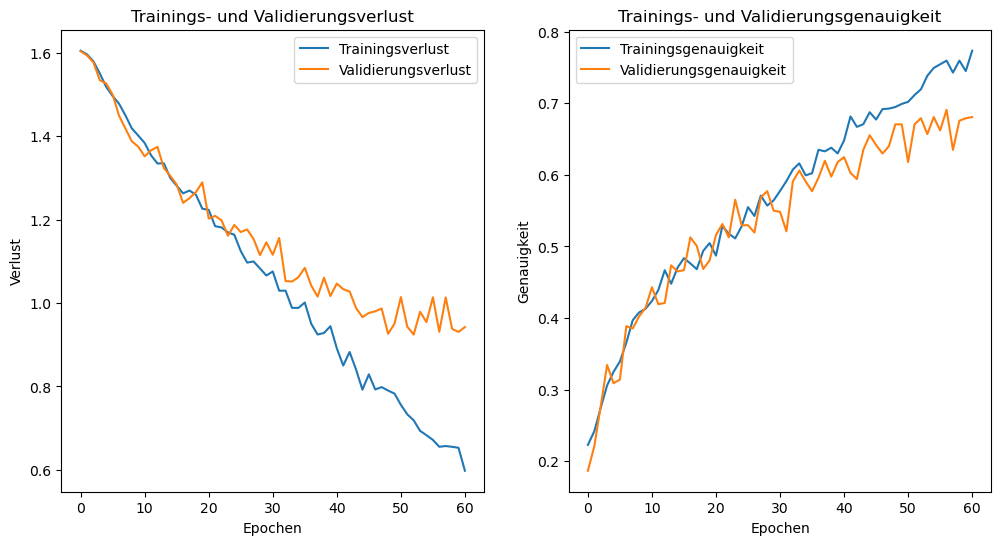

In [132]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()

# Plot für Trainings- und Validierungsgenauigkeit
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()

plt.show()

19/19 [==============================] - 1s 63ms/step


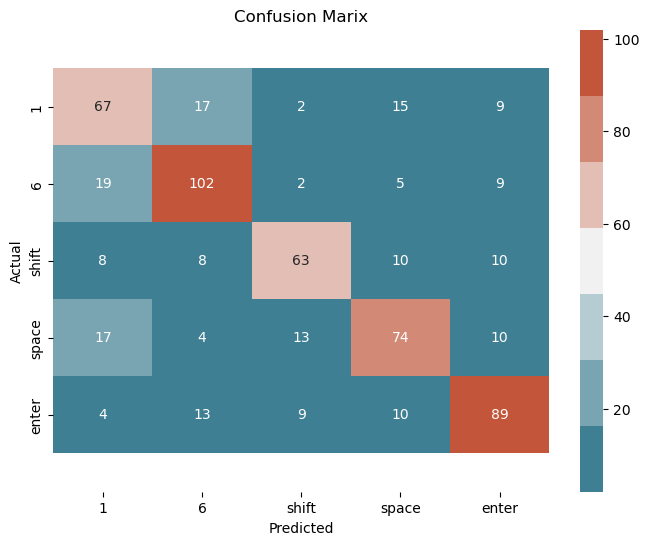

In [133]:
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_val, axis=1)
cm = confusion_matrix(actual_classes, predicted_classes)
plot_cm(actual_classes, predicted_classes, relevant_classes)

In [134]:
wandb.finish()

accuracy,▁▁▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█████
loss_train,███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
loss_valid,██▇▇▆▆▆▅▆▅▅▄▅▄▄▃▄▄▃▃▃▂▂▃▂▂▂▂▂▁▂▂▁▂▁▂▂▁▁▁
val_accuracy,▁▁▃▃▄▄▄▅▄▅▅▆▅▆▆▆▆▆▆▆▆▇▇▆▇▇▇▇▇█▇▇█▇██████
accuracy,0.77349
loss_train,0.59792
loss_valid,0.94243
val_accuracy,0.68081


## Second Approach:

In [135]:
features_list = []
for sample in training_data:
    # MFCC-Feature-Extraktion
    mfccs = librosa.feature.mfcc(y=sample, sr=len(training_data[0]), n_mfcc=13)
    features_list.append(mfccs)

In [136]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels_train)

X = np.array(features_list) 
y = to_categorical(encoded_labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

model_2 = Sequential()
model_2.add(Conv2D(filters=filter1, kernel_size=(kern1, kern1), input_shape=(len(X_train[0]),len(X_train[0][0]), 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(filters=filter2, kernel_size=(kern2, kern2), activation='relu',padding='same'))
model_2.add(AveragePooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(Dense(dense, activation='relu'))
model_2.add(Dropout(0,2))
model_2.add(Dense(5, activation='softmax'))
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 38, 32)         832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 19, 32)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 4, 19, 32)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 19, 128)        102528    
                                                                 
 average_pooling2d_2 (Avera  (None, 2, 9, 128)         0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 2304)             

In [138]:
lrate = learning_rate
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model_2.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
history_2=model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch, callbacks=[early_stopping])
model_2.save("./Modell/audio_classifyer_adam")

Epoch 1/64
43/43 [==============================] - 2s 26ms/step - loss: 3.2259 - accuracy: 0.3227 - val_loss: 1.3463 - val_accuracy: 0.3582
Epoch 2/64
43/43 [==============================] - 1s 23ms/step - loss: 1.4995 - accuracy: 0.3656 - val_loss: 1.4942 - val_accuracy: 0.3158
Epoch 3/64
43/43 [==============================] - 1s 23ms/step - loss: 1.4529 - accuracy: 0.3409 - val_loss: 1.3547 - val_accuracy: 0.4143
Epoch 4/64
43/43 [==============================] - 1s 21ms/step - loss: 1.3189 - accuracy: 0.4436 - val_loss: 1.2449 - val_accuracy: 0.5348
Epoch 5/64
43/43 [==============================] - 1s 22ms/step - loss: 1.2125 - accuracy: 0.5106 - val_loss: 1.0871 - val_accuracy: 0.5722
Epoch 6/64
43/43 [==============================] - 1s 22ms/step - loss: 1.0936 - accuracy: 0.5499 - val_loss: 1.0670 - val_accuracy: 0.5671
Epoch 7/64
43/43 [==============================] - 1s 21ms/step - loss: 0.9531 - accuracy: 0.6213 - val_loss: 0.7111 - val_accuracy: 0.7521
Epoch 8/64
43

INFO:tensorflow:Assets written to: ./Modell/audio_classifyer_adam\assets


In [139]:
loss,acc = model_2.evaluate(X_train, y_train, verbose=0)
print("Accuracy on Test Data : %.2f%%" % (acc*100))
loss,acc = model_2.evaluate(X_val, y_val, verbose=0)
print("Accuracy on Test Data : %.2f%%" % (acc*100))

Accuracy on Test Data : 99.27%
Accuracy on Test Data : 89.30%


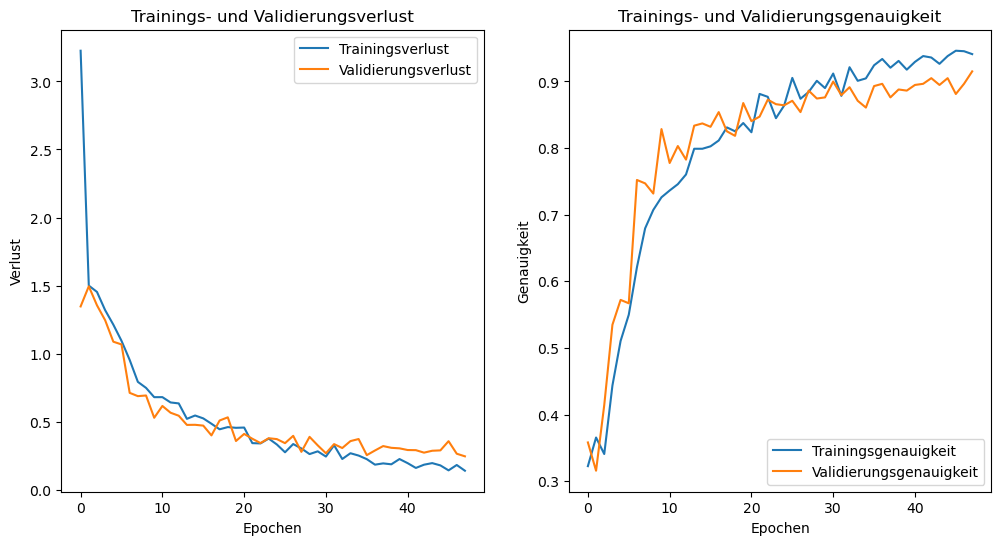

In [140]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Trainingsverlust')
plt.plot(history_2.history['val_loss'], label='Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()

# Plot für Trainings- und Validierungsgenauigkeit
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history_2.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()

plt.show()

19/19 [==============================] - 0s 7ms/step


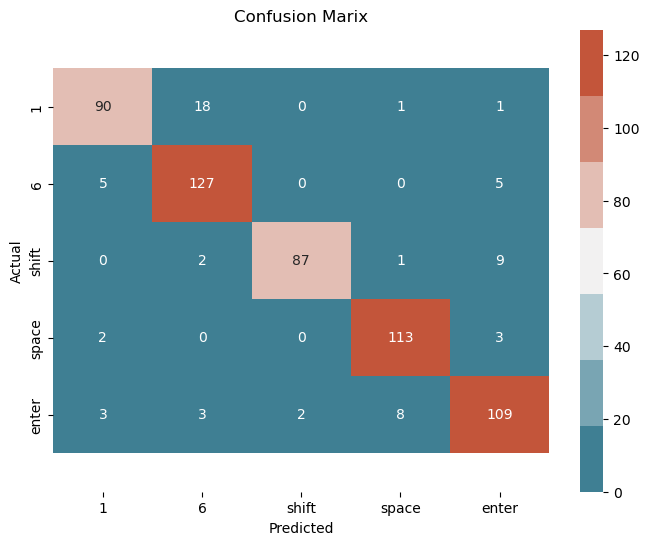

In [141]:
predictions = model_2.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_val, axis=1)
cm = confusion_matrix(actual_classes, predicted_classes)
plot_cm(actual_classes, predicted_classes, relevant_classes)

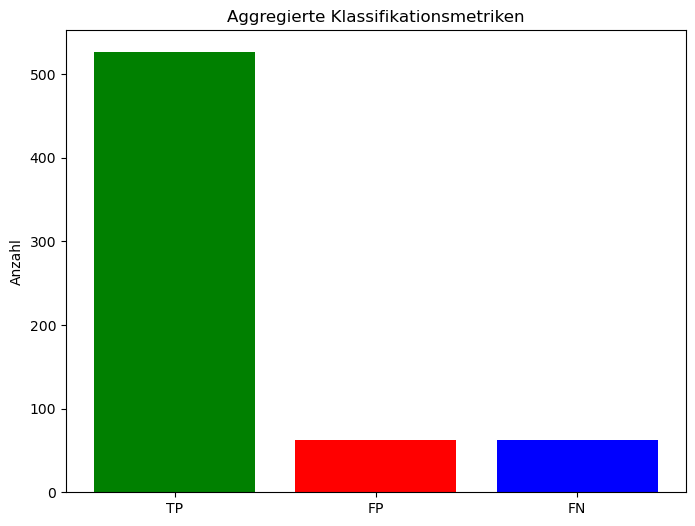

In [143]:
TP = np.sum(np.diag(cm))
FP = np.sum(cm, axis=0) - np.diag(cm)
FN = np.sum(cm, axis=1) - np.diag(cm)

# Aggregierte FP und FN
total_FP = np.sum(FP)
total_FN = np.sum(FN)

# Visualisierung
values = [TP, total_FP, total_FN]
labels = ['TP', 'FP', 'FN']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red', 'blue'])
plt.title('Aggregierte Klassifikationsmetriken')
plt.ylabel('Anzahl')
plt.show()

In [142]:
wandb.finish()

Quellen:

Logan, Beth. (2000). Mel Frequency Cepstral Coefficients for Music Modeling. Proc. 1st Int. Symposium Music Information Retrieval.  https://ismir2000.ismir.net/papers/logan_paper.pdf 

McFee, Brian, Colin Raffel, Dawen Liang, Daniel PW Ellis, Matt McVicar, Eric Battenberg, and Oriol Nieto. "librosa: Audio and music signal analysis in python." In Proceedings of the 14th python in science conference, pp. 18-25. 2015